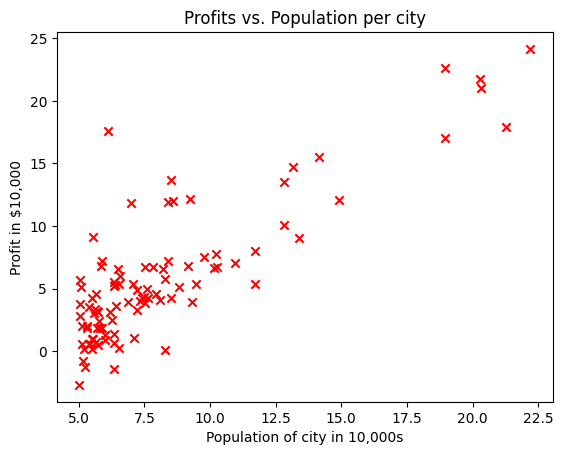

Iteration    0: Cost     6.74 
Iteration  150: Cost     5.31 
Iteration  300: Cost     4.96 
Iteration  450: Cost     4.76 
Iteration  600: Cost     4.64 
Iteration  750: Cost     4.57 
Iteration  900: Cost     4.53 
Iteration 1050: Cost     4.51 
Iteration 1200: Cost     4.50 
Iteration 1350: Cost     4.49 
w,b found by gradient descent: 1.166362350335582 -3.63029143940436
For population = 35,000, we predict a profit of $4519.77
For population = 70,000, we predict a profit of $45342.45


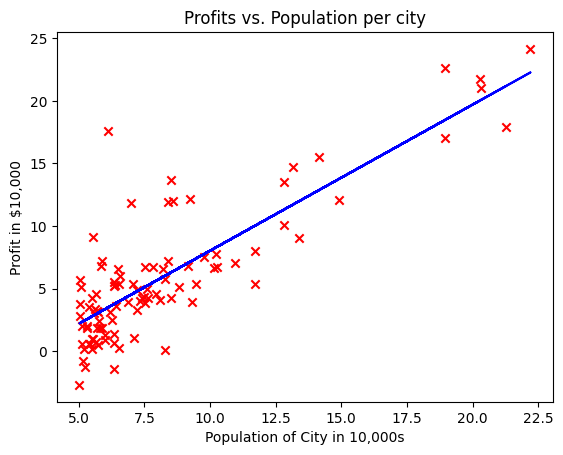

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math
%matplotlib inline

# first lets load the data set
x_train, y_train = load_data()

# x_train is a numpy array that contains decimal values that are all greater than zero
# these values represent the city population times 10,000
# y_train is also a numpy array that has decimal value, but contains some negative and some positive
# these represent your restaurant's average monthly profits in each city, in units of $10,000
# the city population array has 97 data points, and the monthly average profits also has 97 data points

# Now we are gonna create a scatter plot of the data, to better visualize the data
# we will use the 'marker' and 'c' parameters
plt.scatter(x_train, y_train, marker='x',  c = 'r')

# set the title
plt.title('Profits vs. Population per city')
# set the y-axis label
plt.ylabel('Profit in $10,000')
# set the x-axis label
plt.xlabel('Population of city in 10,000s')
plt.show()

def compute_cost(x,y,w,b):
    m = x.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i]) ** 2
    cost = cost / (2 * m)
    return cost
def gradient_function(x, y, w, b):
    m  = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w * x[i] + b
        dj_db += f_wb - y[i]
        dj_dw += (f_wb - y[i]) * x[i]
    dj_db = dj_db / m
    dj_dw = dj_dw / m

    return dj_dw, dj_db

def gradient_descent(x, y, w_init, b_init, compute_cost, gradient_function, alpha, num_iters):
    m = x.shape[0]
    J_history = []
    w_history = []
    w = copy.deepcopy(w_init)
    b = b_init 

    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x,y, w, b)

        w = w - alpha * dj_dw 
        b = b - alpha * dj_db

        if i < 100000:
            cost = compute_cost(x,y,w,b)
            J_history.append(cost)

        if i % math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f'Iteration {i:4}: Cost {float(J_history[-1]):8.2f} ')

    return w, b, J_history, w_history
    
# initialize fitting parameters. Recall that the shape of w is (n,)
initial_w = 0.
initial_b = 0.

# some gradient descent settings
iterations = 1500
alpha = 0.01

w,b,_,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                     compute_cost, gradient_function, alpha, iterations)
print("w,b found by gradient descent:", w, b)

m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_train[i] + b

# Plot the linear fit
plt.plot(x_train, predicted, c = "b")

# Create a scatter plot of the data. 
plt.scatter(x_train, y_train, marker='x', c='r') 

# Set the title
plt.title("Profits vs. Population per city")
# Set the y-axis label
plt.ylabel('Profit in $10,000')
# Set the x-axis label
plt.xlabel('Population of City in 10,000s')

predict1 = 3.5 * w + b
print('For population = 35,000, we predict a profit of $%.2f' % (predict1*10000))

predict2 = 7.0 * w + b
print('For population = 70,000, we predict a profit of $%.2f' % (predict2*10000))